In [236]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [237]:
curb_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_CurbRamps_0720.csv")
curb_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,CurbRamps_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,9.4,4078.977747,12.167755
3,530330005002,0.8,1272.567412,3.319274
4,530330006001,0.0,721.497231,0.000000


In [238]:
problem_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_Problems_0720.csv")
problem_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,Problems_WeightedCount_per_mile
0,530330004012,80.0,3746.260838,112.752427
1,530330004023,3.0,305.668468,51.820851
2,530330004024,6.0,4078.977747,7.766652
3,530330005002,10.0,1272.567412,41.490926
4,530330006001,0.0,721.497231,0.000000


In [239]:
nosidewalk_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_NoSidewalk_0720.csv")
nosidewalk_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,NoSidewalk_WeightedCount_per_mile
0,530330004012,80.0,3746.260838,112.752427
1,530330004023,3.0,305.668468,51.820851
2,530330004024,0.0,4078.977747,0.000000
3,530330005002,8.0,1272.567412,33.192741
4,530330006001,0.0,721.497231,0.000000


In [240]:
nocurbramp_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_NoCurbRamp_0720.csv")
nocurbramp_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,NoCurbRamp_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,0.0,4078.977747,0.000000
3,530330005002,2.0,1272.567412,8.298185
4,530330006001,0.0,721.497231,0.000000


In [241]:
surfaceproblem_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_SurfaceProblem_0720.csv")
surfaceproblem_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,SurfaceProblem_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,4.0,4078.977747,5.177768
3,530330005002,0.0,1272.567412,0.000000
4,530330006001,0.0,721.497231,0.000000


In [242]:
obstacle_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_Obstacle_0720.csv")
obstacle_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,Obstacle_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,2.0,4078.977747,2.588884
3,530330005002,0.0,1272.567412,0.000000
4,530330006001,0.0,721.497231,0.000000


In [243]:
social_factors = pd.read_csv("SeattleData/SeattleSocialFactors_1.csv")
social_factors.head()

,Geo_FIPS,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,murder_index,rape_index,robbery_index,assault_index,burglary_index,larceny_index,car_theft_index,crime_index
0,530330001001,0.805365,0.248281,0.000000,0.000000,0.365887,0.070839,0.026823,0.000000,1.6,16.32,4.40,1647,154138,71251,133,1035,0.149076,0.404101,0.173287,0.310203,0.118847,4209.9,590.7,0.140312,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104,26,13,8,74,71,123,75,37
1,530330001002,0.666436,0.183011,0.015884,0.060083,0.306630,0.185773,0.000000,0.000000,1.6,17.34,4.28,821,30978,23190,123,1004,0.157356,0.391732,0.204916,0.326656,0.077755,13004.2,1921.9,0.147791,0.147059,0.043417,0.060224,0.060224,0.135854,0.054622,0.100840,0.397759,93,196,197,185,196,147,188,197,196
2,530330001003,0.593532,0.314521,0.022194,0.000000,0.424857,0.103995,0.019023,0.000000,1.6,17.95,4.57,797,66118,52181,119,1321,0.152064,0.393374,0.189434,0.320162,0.100150,11017.0,1676.7,0.152192,0.302583,0.066421,0.000000,0.146371,0.067651,0.094711,0.017220,0.305043,95,194,193,174,192,124,180,194,193
3,530330001004,0.608620,0.124636,0.056494,0.000000,0.367501,0.147932,0.000000,0.012813,1.7,15.08,4.37,674,34758,22211,124,1700,0.158326,0.387533,0.208966,0.332019,0.072405,35176.5,4609.6,0.131042,0.060706,0.039735,0.000000,0.025386,0.161148,0.162252,0.320088,0.195364,22,197,196,186,194,147,189,196,196
4,530330001005,0.396004,0.253406,0.023615,0.000000,0.345141,0.184378,0.015441,0.020890,1.6,16.88,4.54,989,57292,41977,119,1007,0.152415,0.386423,0.193007,0.320597,0.095382,12370.6,1786.4,0.144407,0.127596,0.000000,0.000000,0.000000,0.037092,0.000000,0.106825,0.728487,150,187,168,194,182,171,196,187,179


In [244]:
social_factors = social_factors.rename(columns={'Geo_FIPS': 'GEOID10'})

In [245]:
df = social_factors.merge(curb_labels, how='inner', on='GEOID10')
df = df.merge(problem_labels, how='outer', on='GEOID10')
df = df.merge(nocurbramp_labels, how='outer', on='GEOID10')
df = df.merge(nosidewalk_labels, how='outer', on='GEOID10')
df = df.merge(surfaceproblem_labels, how='outer', on='GEOID10')
df = df.merge(obstacle_labels, how='outer', on='GEOID10')

In [246]:
df.head()

,GEOID10,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,murder_index,rape_index,robbery_index,assault_index,burglary_index,larceny_index,car_theft_index,crime_index,WeightedCount_x,SidewalkLeng_x,CurbRamps_WeightedCount_per_mile,WeightedCount_y,SidewalkLeng_y,Problems_WeightedCount_per_mile,WeightedCount_x,SidewalkLeng_x,NoCurbRamp_WeightedCount_per_mile,WeightedCount_y,SidewalkLeng_y,NoSidewalk_WeightedCount_per_mile,WeightedCount_x,SidewalkLeng_x,SurfaceProblem_WeightedCount_per_mile,WeightedCount_y,SidewalkLeng_y,Obstacle_WeightedCount_per_mile
0,530330004012,0.622730,0.181605,0.024019,0.000000,0.289397,0.057996,0.006444,0.022261,1.6,18.38,4.10,992,89959,52108,121,1312,0.153379,0.400576,0.187448,0.317746,0.094556,10864.0,1686.6,0.155247,0.432298,0.083230,0.0,0.017391,0.016149,0.000000,0.336646,0.114286,146,166,42,177,141,136,185,161,147,0.0,3746.260838,0.000000,80.0,3746.260838,112.752427,0.0,3746.260838,0.000000,80.0,3746.260838,112.752427,0.0,3746.260838,0.000000,0.0,3746.260838,0.000000
1,530330004023,0.666900,0.185133,0.015428,0.000000,0.260870,0.107293,0.046985,0.000000,1.6,19.43,4.21,986,64604,56927,129,919,0.155028,0.399523,0.189448,0.321140,0.091672,11444.4,1861.9,0.162691,0.310044,0.135371,0.0,0.043668,0.117904,0.152838,0.240175,0.000000,107,95,35,25,121,55,91,89,87,0.0,305.668468,0.000000,3.0,305.668468,51.820851,0.0,305.668468,0.000000,3.0,305.668468,51.820851,0.0,305.668468,0.000000,0.0,305.668468,0.000000
2,530330004024,0.582168,0.188228,0.061772,0.000000,0.298951,0.085082,0.000000,0.047786,1.6,15.25,4.25,1271,68257,43276,129,2626,0.157307,0.401491,0.192399,0.322975,0.077128,10988.3,1453.6,0.132286,0.296414,0.071730,0.0,0.000000,0.000000,0.000000,0.141350,0.490506,182,49,12,17,197,62,108,72,88,9.4,4078.977747,12.167755,6.0,4078.977747,7.766652,0.0,4078.977747,0.000000,0.0,4078.977747,0.000000,4.0,4078.977747,5.177768,2.0,4078.977747,2.588884
3,530330005002,0.829442,0.187817,0.078173,0.000000,0.349239,0.087310,0.000000,0.000000,2.6,12.31,4.67,1313,133929,74433,127,587,0.149684,0.402849,0.173886,0.311671,0.119486,6306.7,691.5,0.109645,0.964623,0.035377,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,169,27,111,102,138,30,75,101,32,0.8,1272.567412,3.319274,10.0,1272.567412,41.490926,2.0,1272.567412,8.298185,8.0,1272.567412,33.192741,0.0,1272.567412,0.000000,0.0,1272.567412,0.000000
4,530330006001,0.811298,0.175481,0.019832,0.021635,0.472356,0.056490,0.010216,0.000000,2.1,18.27,4.51,1026,68195,31917,123,1221,0.155259,0.399879,0.189436,0.313015,0.095347,4784.1,738.9,0.154449,0.823708,0.000000,0.0,0.000000,0.120061,0.022796,0.033435,0.000000,133,118,95,115,69,94,165,120,110,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000


In [247]:
df_plot = df.drop(columns=['GEOID10','murder_index','rape_index','robbery_index','assault_index','assault_index','burglary_index','larceny_index','car_theft_index','SidewalkLeng_y', 'WeightedCount_y','SidewalkLeng_x','WeightedCount_x'])
df_plot = df_plot.rename(columns={'CurbRamps_WeightedCount_per_mile': 'CurbRamps_wcpm','Problems_WeightedCount_per_mile': 'Problems_wcpm','NoCurbRamp_WeightedCount_per_mile': 'NoCurbRamp_wcpm','NoSidewalk_WeightedCount_per_mile': 'NoSidewalk_wcpm','SurfaceProblem_WeightedCount_per_mile': 'SurfaceProblem_wcpm','Obstacle_WeightedCount_per_mile': 'Obstacle_wcpm'})

In [248]:
corr = df_plot.corr()

In [249]:
corr

,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,crime_index,CurbRamps_wcpm,Problems_wcpm,NoCurbRamp_wcpm,NoSidewalk_wcpm,SurfaceProblem_wcpm,Obstacle_wcpm
family_ppl%,1.000000,0.009617,-0.038463,-0.078662,0.549823,-0.407705,-0.033884,-0.728101,0.759377,-0.031552,0.427564,0.259554,0.578407,0.161868,0.396795,-0.218548,-0.140156,0.172956,-0.528619,-0.426632,0.422187,-0.608770,-0.589913,-0.017824,0.832276,0.068847,0.049475,-0.120779,-0.242271,-0.440674,-0.648921,-0.588084,0.450775,-0.650581,-0.585644,0.390942,0.261322,0.291802,0.061158,-0.218748
ttw_30_59%,0.009617,1.000000,0.015276,0.025048,0.307514,0.382212,0.134598,-0.149323,0.097989,0.205154,0.311429,0.010847,-0.039018,-0.036324,-0.150035,-0.082310,0.317456,0.251123,0.034467,0.026916,-0.272388,-0.024981,0.015055,0.213321,-0.018893,0.116579,0.073722,0.136012,0.195410,0.145749,0.015621,-0.163286,-0.152271,0.050942,-0.123892,0.050382,0.152425,-0.009884,0.016957,-0.135121
ttw_60_89%,-0.038463,0.015276,1.000000,0.016389,-0.010831,0.187276,-0.043303,0.002747,-0.058598,0.022716,0.040355,-0.048405,-0.156156,-0.096195,-0.118881,-0.085855,0.145929,-0.017974,0.134407,0.087761,-0.131520,0.082777,0.070010,0.022114,-0.058053,0.069973,-0.011367,-0.004083,0.086033,0.070097,0.091474,-0.035337,-0.083771,0.101539,0.023292,-0.077795,-0.097212,-0.031303,0.034214,0.023072
ttw_90%,-0.078662,0.025048,0.016389,1.000000,-0.010588,0.116835,-0.022656,0.026384,-0.008543,-0.008470,0.032572,-0.118387,-0.074984,-0.067754,-0.087097,0.001438,0.158695,0.048171,0.102775,0.097672,-0.160319,0.016477,0.020273,-0.005568,-0.043267,0.023743,-0.051275,0.006935,-0.043841,0.054529,0.084662,0.012097,-0.060606,0.080256,-0.036401,-0.119544,0.025990,-0.105942,-0.087053,-0.021288
ttw_bycar%,0.549823,0.307514,-0.010831,-0.010588,1.000000,-0.365907,0.008791,-0.640872,0.624043,0.030737,0.389468,0.226689,0.408613,0.204019,0.128105,-0.206520,0.114609,0.369451,-0.395005,-0.326833,0.094617,-0.415928,-0.391279,0.044312,0.474496,0.169905,0.097659,0.038977,0.072367,-0.149359,-0.379443,-0.500120,0.188130,-0.368263,-0.554225,0.317722,0.223475,0.222309,0.024040,-0.079599
ttw_bytransit%,-0.407705,0.382212,0.187276,0.116835,-0.365907,1.000000,0.046400,0.191076,-0.361636,0.241877,0.125330,-0.208304,-0.358744,-0.151696,-0.250367,0.009606,0.221789,-0.072344,0.332049,0.218977,-0.311003,0.274573,0.300604,0.241124,-0.433986,0.103702,0.052632,0.135895,0.226439,0.399318,0.384885,0.119803,-0.326383,0.374152,0.277951,-0.184450,-0.028680,-0.208100,0.142154,0.015563
ttw_bybike%,-0.033884,0.134598,-0.043303,-0.022656,0.008791,0.046400,1.000000,-0.094544,0.049609,0.010757,0.097841,0.025191,0.049826,0.040926,0.002499,-0.075862,0.183523,0.209705,-0.034891,0.098651,-0.155660,-0.064690,-0.057474,0.014082,0.005396,0.092700,0.200716,0.233544,0.101295,0.081748,-0.016379,-0.179273,-0.161648,-0.054802,-0.009200,0.079847,0.213207,-0.036408,0.111235,-0.086380
ttw_byfoot%,-0.728101,-0.149323,0.002747,0.026384,-0.640872,0.191076,-0.094544,1.000000,-0.693172,0.137341,-0.211590,-0.138253,-0.392360,0.001802,-0.249583,0.229949,-0.000591,-0.214732,0.354165,0.336108,-0.200916,0.595060,0.608528,0.129426,-0.606235,-0.182565,-0.124592,-0.039852,-0.005265,0.221767,0.450026,0.617282,-0.276007,0.510290,0.552494,-0.390074,-0.244521,-0.287285,-0.054020,0.108370
median_vehicles_per_household,0.759377,0.097989,-0.058598,-0.008543,0.624043,-0.361636,0.049609,-0.693172,1.000000,-0.169112,0.210262,0.348337,0.641249,0.198251,0.395584,-0.254708,-0.050012,0.392869,-0.628207,-0.478909,0.324124,-0.587720,-0.584351,-0.160091,0.770088,0.061144,0.055956,-0.017510,-0.08

In [250]:
x= corr[['CurbRamps_wcpm','Problems_wcpm','NoCurbRamp_wcpm','NoSidewalk_wcpm','SurfaceProblem_wcpm','Obstacle_wcpm']]

In [251]:
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#006B76"],
          [norm(-0.3), "#088A97"],
          [norm(0), "#E0B5A4"],
          [norm(0.3), "#CF8996"],
          [norm(1.0), "#B06071"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

In [252]:
mask = x[(x >= 0.2) | (x <= -0.2)]

In [253]:
mask2 = x[(x >= 0.2) & (x <= 0.4) | (x >= -0.4) & (x <= -0.2)]

In [254]:
mask2

,CurbRamps_wcpm,Problems_wcpm,NoCurbRamp_wcpm,NoSidewalk_wcpm,SurfaceProblem_wcpm,Obstacle_wcpm
family_ppl%,NaN,0.390942,0.261322,0.291802,NaN,-0.218748
ttw_30_59%,NaN,NaN,NaN,NaN,NaN,NaN
ttw_60_89%,NaN,NaN,NaN,NaN,NaN,NaN
ttw_90%,NaN,NaN,NaN,NaN,NaN,NaN
ttw_bycar%,NaN,0.317722,0.223475,0.222309,NaN,NaN
ttw_bytransit%,0.277951,NaN,NaN,-0.208100,NaN,NaN
ttw_bybike%,NaN,NaN,0.213207,NaN,NaN,NaN
ttw_byfoot%,NaN,-0.390074,-0.244521,-0.287285,NaN,NaN
median_vehicles_per_household,NaN,NaN,0.302695,0.324801,NaN,NaN
ppl_growth%_2010_2020,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0.5, 0, 'CurbRamps_wcpm'),
 Text(1.5, 0, 'Problems_wcpm'),
 Text(2.5, 0, 'NoCurbRamp_wcpm'),
 Text(3.5, 0, 'NoSidewalk_wcpm'),
 Text(4.5, 0, 'SurfaceProblem_wcpm'),
 Text(5.5, 0, 'Obstacle_wcpm')]

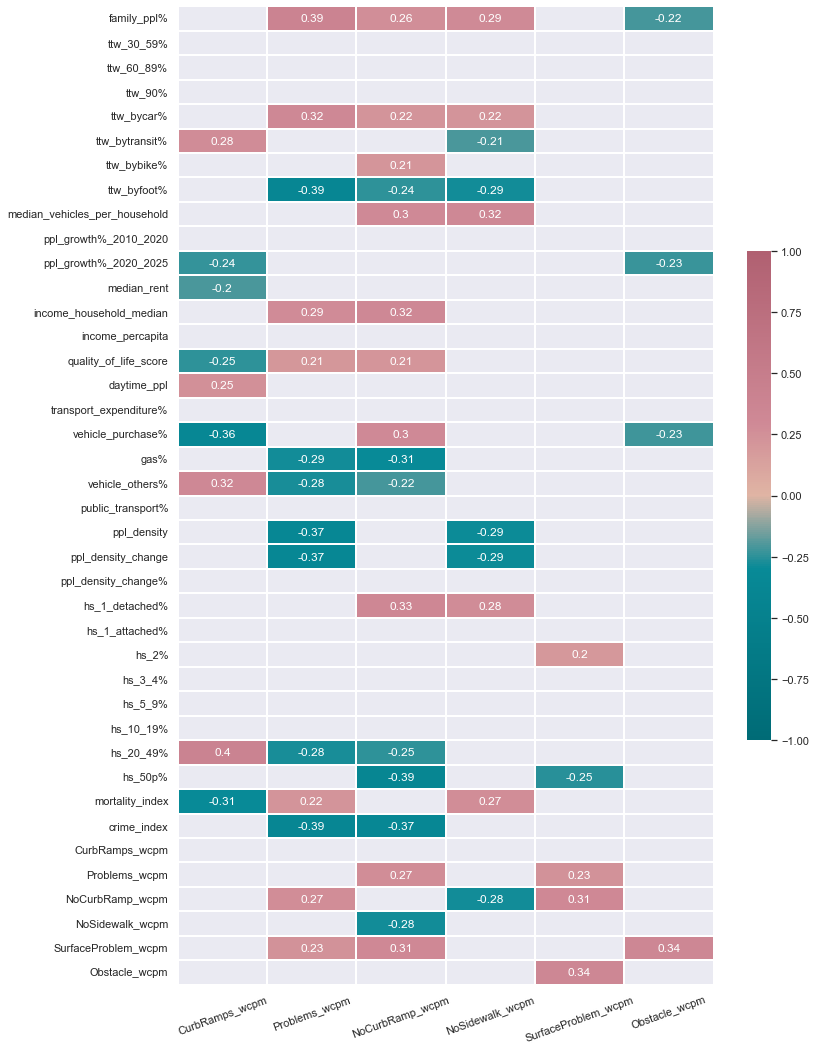

In [255]:
fig, axs = plt.subplots(figsize=(12,18))
heatmap = sns.heatmap(mask2, vmin=-1, vmax=1,annot=True, cmap=cmap, annot_kws={"size":12}, cbar_kws={"shrink":0.5},linewidth=2)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 20)

In [256]:
fig.savefig("Figures/Correlation3.png", dpi=300)

In [183]:
df_plot

,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,crime_index,CurbRamps_wcpm,Problems_wcpm,NoCurbRamp_wcpm,NoSidewalk_wcpm,SurfaceProblem_wcpm,Obstacle_wcpm
0,0.622730,0.181605,0.024019,0.000000,0.289397,0.057996,0.006444,0.022261,1.6,18.38,4.10,992,89959,52108,121,1312,0.153379,0.400576,0.187448,0.317746,0.094556,10864.0,1686.6,0.155247,0.432298,0.083230,0.000000,0.017391,0.016149,0.000000,0.336646,0.114286,146,147,0.000000,112.752427,0.000000,112.752427,0.000000,0.000000
1,0.666900,0.185133,0.015428,0.000000,0.260870,0.107293,0.046985,0.000000,1.6,19.43,4.21,986,64604,56927,129,919,0.155028,0.399523,0.189448,0.321140,0.091672,11444.4,1861.9,0.162691,0.310044,0.135371,0.000000,0.043668,0.117904,0.152838,0.240175,0.000000,107,87,0.000000,51.820851,0.000000,51.820851,0.000000,0.000000
2,0.582168,0.188228,0.061772,0.000000,0.298951,0.085082,0.000000,0.047786,1.6,15.25,4.25,1271,68257,43276,129,2626,0.157307,0.401491,0.192399,0.322975,0.077128,10988.3,1453.6,0.132286,0.296414,0.071730,0.000000,0.000000,0.000000,0.000000,0.141350,0.490506,182,88,12.167755,7.766652,0.000000,0.000000,5.177768,2.588884
3,0.829442,0.187817,0.078173,0.000000,0.349239,0.087310,0.000000,0.000000,2.6,12.31,4.67,1313,133929,74433,127,587,0.149684,0.402849,0.173886,0.311671,0.119486,6306.7,691.5,0.109645,0.964623,0.035377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,169,32,3.319274,41.490926,8.298185,33.192741,0.000000,0.000000
4,0.811298,0.175481,0.019832,0.021635,0.472356,0.056490,0.010216,0.000000,2.1,18.27,4.51,1026,68195,31917,123,1221,0.155259,0.399879,0.189436,0.313015,0.095347,4784.1,738.9,0.154449,0.823708,0.000000,0.000000,0.000000,0.120061,0.022796,0.033435,0.000000,133,110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.837209,0.155900,0.017227,0.000000,0.317829,0.049096,0.027562,0.018088,2.0,12.50,4.39,650,83025,40006,134,3375,0.152676,0.385284,0.190124,0.317990,0.106969,11965.9,1329.6,0.111116,0.793103,0.118227,0.000000,0.000000,0.054187,0.034483,0.000000,0.000000,103,166,3.992901,49.385886,27.319852,8.406108,13.659926,0.000000
360,0.728529,0.182626,0.000000,0.022705,0.315893,0.160908,0.045410,0.000000,2.2,16.17,4.54,674,54754,24352,123,2302,0.158845,0.401030,0.200471,0.322137,0.073636,2495.6,347.4,0.139205,0.650794,0.111111,0.058957,0.083900,0.074830,0.020408,0.000000,0.000000,53,95,24.433550,50.903229,50.903229,0.000000,0.000000,0.000000
361,0.741635,0.211190,0.009874,0.026330,0.315963,0.130005,0.000000,0.017005,1.7,15.75,4.39,655,42232,27848,118,1008,0.155521,0.394656,0.197639,0.322720,0.083887,10929.3,1486.8,0.136038,0.464286,0.022619,0.000000,0.036905,0.020238,0.020238,0.133333,0.302381,165,196,34.025128,0.000000,0.000000,0.000000,0.000000,0.000000
362,0.775833,0.186667,0.000000,0.011667,0.388333,0.069167,0.000000,0.000000,2.4,18.93,4.42,1357,122101,62878,125,765,0.154438,0.406188,0.182706,0.315939,0.097685,5360.2,853.1,0.159155,0.958984,0.000000,0.041016,0.000000,0.000000,0.000000,0.000000,0.000000,146,56,13.049547,0.000000,0.000000,0.000000,0.000000,0.000000


In [184]:
r1 = stats.pearsonr(df_plot['CurbRamps_wcpms_wcpm'], df_plot['ppl_density'])
r1

(0.47339560964608546, 9.943068338184457e-22)

In [191]:
text1 = "r={:.3f}, p≤0.005".format(r1[0], r1[1])
text1

'r=0.473, p≤0.005'

Text(0, 60, 'r=0.473, p≤0.005')

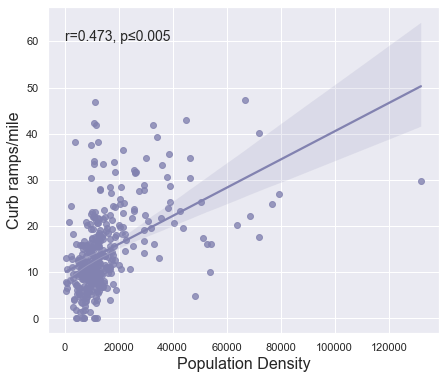

In [192]:
plt.figure(figsize = (7,6))
p1= sns.regplot(y="CurbRamps_wcpms_wcpm", x="ppl_density", data=df_plot,fit_reg=True, color="#8282B0");
p1.set_xlabel("Population Density", fontsize = 16)
p1.set_ylabel("Curb ramps/mile", fontsize = 16)
p1.annotate(text1, xy=(0,60),fontsize = 14)

In [193]:
p1.figure.savefig("Figures/1.png")

In [194]:
r2 = stats.pearsonr(df_plot['CurbRamps_wcpm'], df_plot['family_ppl%'])
r2

(-0.5856442629556613, 6.826776407168208e-35)

In [195]:
text2 = "r={:.3f},  p≤0.005".format(r2[0], r2[1])
text2

'r=-0.586,  p≤0.005'

Text(0, 45, 'r=-0.586,  p≤0.005')

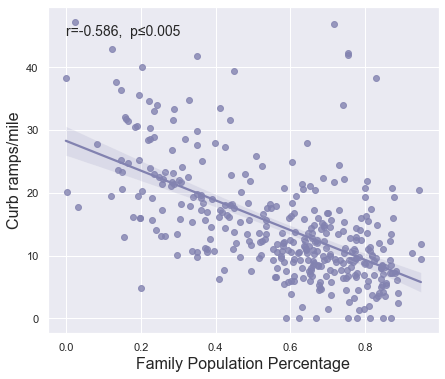

In [199]:
plt.figure(figsize = (7,6))
p2= sns.regplot(y="CurbRamps_wcpm", x="family_ppl%", data=df_plot,fit_reg=True, color="#8282B0");
p2.set_xlabel("Family Population Percentage", fontsize = 16)
p2.set_ylabel("Curb ramps/mile", fontsize = 16)
p2.annotate(text2, xy=(0,45),fontsize = 14)

In [200]:
p2.figure.savefig("Figures/2.png")

In [201]:
r3 = stats.pearsonr(df_plot['CurbRamps_wcpm'], df_plot['ttw_bycar%'])
r3

(-0.5542254995258274, 1.0711320527488875e-30)

In [202]:
text3 = "r={:.3f}, p≤0.005".format(r3[0], r3[1])
text3

'r=-0.554, p≤0.005'

Text(0.03, 45, 'r=-0.554, p≤0.005')

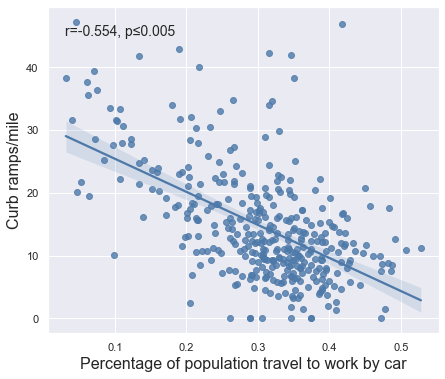

In [208]:
plt.figure(figsize = (7,6))
p3= sns.regplot(y="CurbRamps_wcpm", x="ttw_bycar%", data=df_plot,fit_reg=True, color="#4D79A9");
p3.set_xlabel("Percentage of population travel to work by car", fontsize = 16)
p3.set_ylabel("Curb ramps/mile", fontsize = 16)
p3.annotate(text3, xy=(0.03,45),fontsize = 14)

In [209]:
p3.figure.savefig("Figures/3.png")

In [210]:
r4 = stats.pearsonr(df_plot['CurbRamps_wcpm'], df_plot['ttw_byfoot%'])
r4

(0.5524938798591137, 1.7713742232076704e-30)

In [212]:
text4 = "r={:.3f}, p≤0.005".format(r4[0], r4[1])
text4

'r=0.552, p≤0.005'

Text(0, 45, 'r=0.552, p≤0.005')

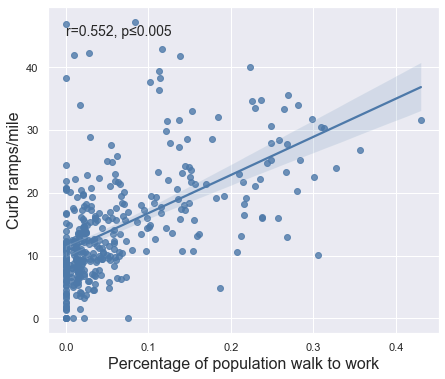

In [217]:
plt.figure(figsize = (7,6))
p4 = sns.regplot(y="CurbRamps_wcpm", x="ttw_byfoot%", data=df_plot,fit_reg=True, color="#4D79A9");
p4.set_xlabel("Percentage of population walk to work", fontsize = 16)
p4.set_ylabel("Curb ramps/mile", fontsize = 16)
p4.annotate(text4, xy=(0,45),fontsize = 14)

In [218]:
p4.figure.savefig("Figures/4.png")

In [220]:
r5 = stats.pearsonr(df_plot['CurbRamps_wcpm'], df_plot['median_vehicles_per_household'])
r5

(-0.5948333299899136, 3.303010225332142e-36)

In [222]:
text5 = "r={:.3f}, p≤0.005".format(r5[0], r5[1])
text5

'r=-0.595, p≤0.005'

Text(0.75, 45, 'r=-0.595, p≤0.005')

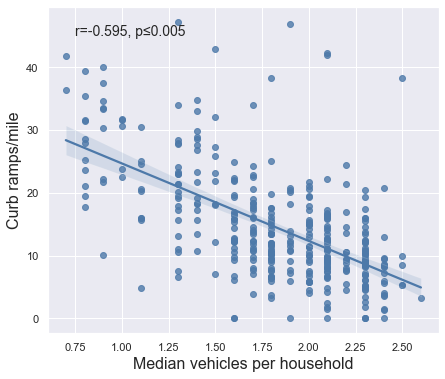

In [224]:
plt.figure(figsize = (7,6))
p5= sns.regplot(y="CurbRamps_wcpm", x="median_vehicles_per_household", data=df_plot,fit_reg=True, color="#4D79A9");
p5.set_xlabel("Median vehicles per household", fontsize = 16)
p5.set_ylabel("Curb ramps/mile", fontsize = 16)
p5.annotate(text5, xy=(0.75,45),fontsize = 14)

In [225]:
p5.figure.savefig("Figures/5.png")

In [226]:
r6 = stats.pearsonr(df_plot['CurbRamps_wcpm'], df_plot['hs_1_detached%'])
r6

(-0.5538906467353233, 1.1808337609034799e-30)

In [227]:
text6 = "r={:.3f}, p≤0.005".format(r6[0], r6[1])
text6

'r=-0.554, p≤0.005'

Text(0, 45, 'r=-0.554, p≤0.005')

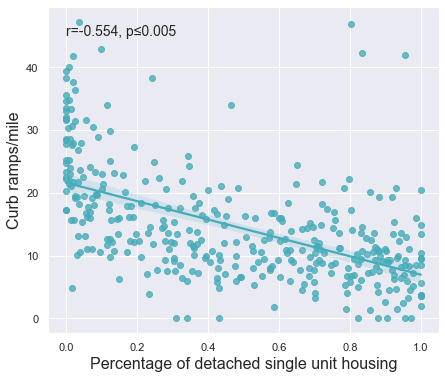

In [229]:
plt.figure(figsize = (7,6))
p6= sns.regplot(y="CurbRamps_wcpm", x="hs_1_detached%", data=df_plot,fit_reg=True, color="#46ACB9");
p6.set_xlabel("Percentage of detached single unit housing", fontsize = 16)
p6.set_ylabel("Curb ramps/mile", fontsize = 16)
p6.annotate(text6, xy=(0,45),fontsize = 14)

In [230]:
p6.figure.savefig("Figures/6.png")

In [231]:
r7 = stats.pearsonr(df_plot['CurbRamps_wcpm'], df_plot['hs_50p%'])
r7

(0.5320607318174728, 5.4026175726080535e-28)

In [232]:
text7 = "r={:.3f}, p≤0.005".format(r7[0], r7[1])
text7

'r=0.532, p≤0.005'

Text(0, 45, 'r=0.532, p≤0.005')

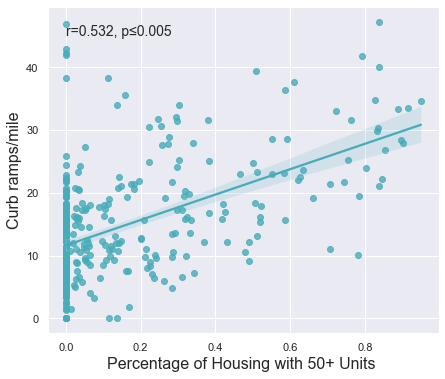

In [233]:
plt.figure(figsize = (7,6))
p7 = sns.regplot(y="CurbRamps_wcpm", x="hs_50p%", data=df_plot,fit_reg=True, color="#46ACB9");
p7.set_xlabel("Percentage of Housing with 50+ Units ", fontsize = 16)
p7.set_ylabel("Curb ramps/mile", fontsize = 16)
p7.annotate(text7, xy=(0,45),fontsize = 14)

In [234]:
p7.figure.savefig("Figures/7.png")